In [28]:
import turtle
import time
import matplotlib.pyplot as plt
import math

In [24]:
def generate_l_system(axiom, rules, iterations):
    current = axiom
    for _ in range(iterations):
        next_seq = ""
        for ch in current:
            next_seq += rules.get(ch, ch)
        current = next_seq
    return current

def draw_l_system(instructions, angle, step):
    stack = []
    for command in instructions:
        if command == "F":
            turtle.forward(step)
        elif command == "+":
            turtle.left(angle)
        elif command == "-":
            turtle.right(angle)
        elif command == "[":
            stack.append((turtle.position(), turtle.heading()))
        elif command == "]":
            position, heading = stack.pop()
            turtle.penup()
            turtle.setposition(position)
            turtle.setheading(heading)
            turtle.pendown()



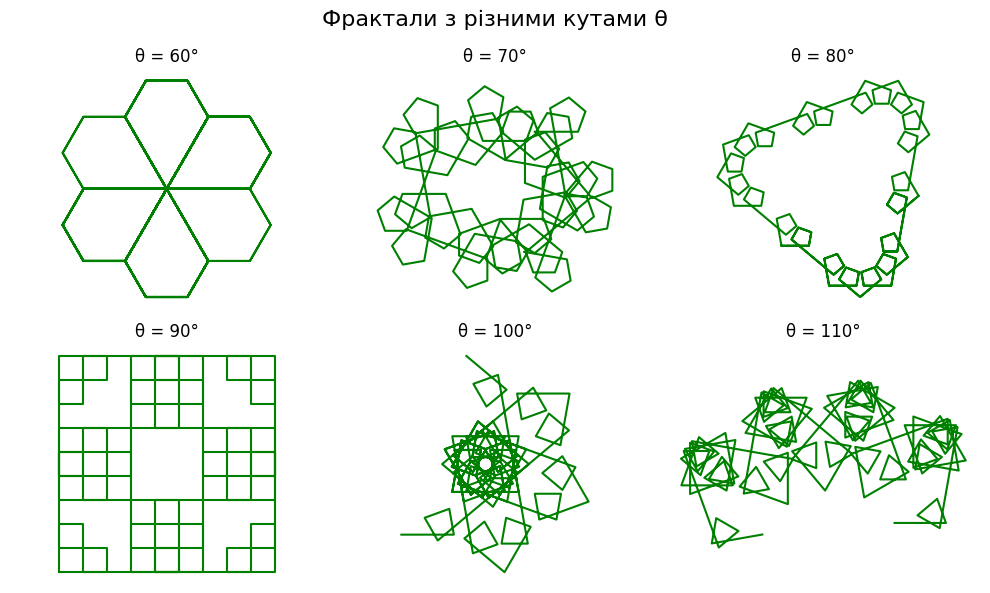

In [30]:
def simulate_turtle(instructions, angle, step):
    x, y = 0.0, 0.0
    direction = 0  
    stack = []
    path_x = [x]
    path_y = [y]

    for command in instructions:
        if command == "F":
            rad = math.radians(direction)
            x += step * math.cos(rad)
            y += step * math.sin(rad)
            path_x.append(x)
            path_y.append(y)
        elif command == "+":
            direction += angle
        elif command == "-":
            direction -= angle
        elif command == "[":
            stack.append((x, y, direction))
        elif command == "]":
            x, y, direction = stack.pop()
            path_x.append(None) 
            path_y.append(None)
            path_x.append(x)
            path_y.append(y)

    return path_x, path_y

axiom = "F+F+F+F"
rules = {"F": "FF+F+F+F+FF"}
iterations = 2
step = 5
theta_values = [60, 70, 80, 90, 100, 110]


fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle("Фрактали з різними кутами θ", fontsize=16)

instructions = generate_l_system(axiom, rules, iterations)

for idx, theta in enumerate(theta_values):
    x, y = simulate_turtle(instructions, theta, step)
    ax = axs[idx // 3][idx % 3]
    ax.plot(x, y, color='green')
    ax.set_title(f"θ = {theta}°")
    ax.axis("equal")
    ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()


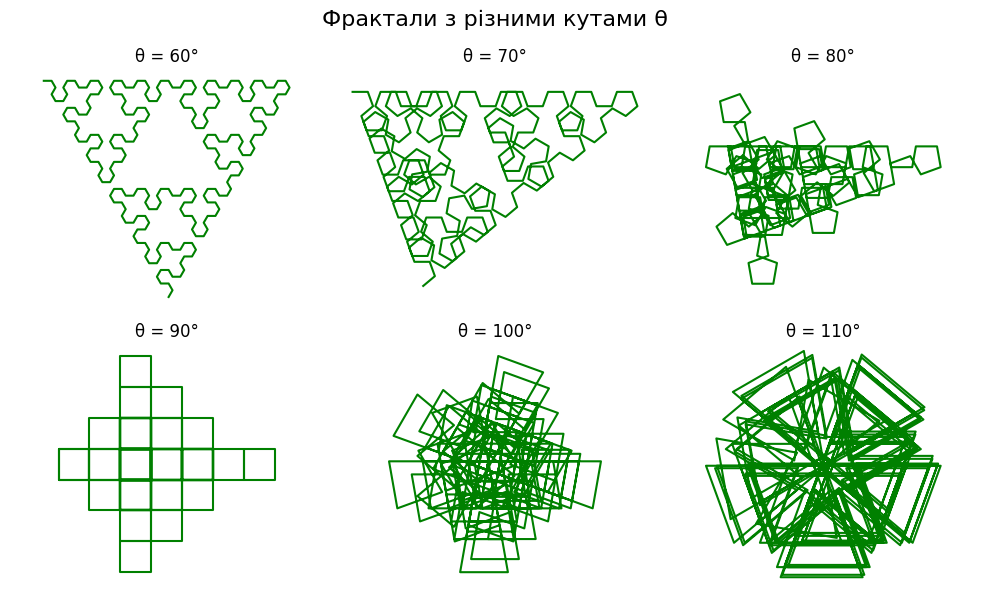

In [29]:
axiom = "YF"
rules = {
    "X": "YF+XF+Y",
    "Y": "XF-YF-X"
}
iterations = 5
step = 15
theta_values = [60, 70, 80, 90, 100, 110]

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle("Фрактали з різними кутами θ", fontsize=16)

instructions = generate_l_system(axiom, rules, iterations)

for idx, theta in enumerate(theta_values):
    x, y = simulate_turtle(instructions, theta, step)
    ax = axs[idx // 3][idx % 3]
    ax.plot(x, y, color='green')
    ax.set_title(f"θ = {theta}°")
    ax.axis("equal")
    ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.88) 
plt.show()
